In [1]:
import pandas as pd
import numpy as np

# ..//experiment/pc5/CHHCO/output

# median hypervolume value: 0.644902 in 0th run
# best hypervolume value: 0.678832 in 19th run

# load data
median_id = 0
df = pd.read_csv('../experiment/pc5/CHHCO/output/selected.%s.txt'%(median_id), header=None)
df.columns = ['choice']
iterations = 10000 // 210 # fe divided by population size

data = []
for i in range(0,1680,210):
    row = {'SPEA2':0, 'CMOEAD':0, 'NSGAII':0, 'CMOMBI2':0, 'NSGAIII':0, 'ThetaDEA':0, 'SPEA2SDE':0, 'HypE':0}
    data.insert(0, row)
df = pd.concat([pd.DataFrame(data), df], ignore_index=True, sort=True)

df = df.head(iterations) # |choices| = iterations minus population initialization

dflist = []
dfblist = []
for i in range(0,8):
    dfb = df['choice'] == i
    dfi = dfb.cumsum()
    dflist.append(dfi)
    dfblist.append(dfb)

df = pd.concat(dflist, axis=1, sort=True)
df.columns = ['SPEA2', 'CMOEAD', 'NSGAII', 'CMOMBI2', 'NSGAIII', 'ThetaDEA', 'SPEA2SDE', 'HypE']

dfb = pd.concat(dfblist, axis=1, sort=True)
dfb.columns = ['SPEA2', 'CMOEAD', 'NSGAII', 'CMOMBI2', 'NSGAIII', 'ThetaDEA', 'SPEA2SDE', 'HypE']

dfb[dfb == True] = df
dfb[dfb == 0] = None


In [2]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')

f = plt.figure(figsize=(8, 6))
ax = f.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

colors={
    "NSGAIII": "tab:blue",
    "SPEA2SDE": "tab:orange",
    "SPEA2": "tab:green",
    "CMOMBI2": "tab:red",
    "ThetaDEA": "tab:purple",
    "CMOEAD": "tab:brown",
    "NSGAII": "tab:pink",
    "HypE": "tab:grey",
}


labels={
    "NSGAIII": "NSGA-III",
    "SPEA2SDE": "SPEA2SDE",
    "SPEA2": "SPEA2",
    "CMOMBI2": "MOMBI2",
    "ThetaDEA": "ThetaDEA",
    "CMOEAD": "MOEA/D",
    "NSGAII": "NSGA-II",
    "HypE": "HypE"
}

offset={
    "NSGAIII": 0.25,
    "SPEA2SDE": -0.25,
    "SPEA2": 0.0,
    "CMOMBI2": 0.0,
    "ThetaDEA": 0.70,
    "CMOEAD": 0.25,
    "NSGAII": -0.25,
    "HypE": -0.70
}
dfmax = df.iloc[[-1]]
df['FE'] = (df.index * 210) # + (8 * 210)
dfb['FE'] = (df.index * 210) # + (8 * 210)

algs=["HypE","NSGAII","CMOEAD","ThetaDEA","CMOMBI2","SPEA2","SPEA2SDE","NSGAIII"]
for alg in algs:
    df.plot(x="FE", y=alg, ax=f.gca(), legend=False, color=colors[alg], style=":")
    plt.text(9870, dfmax[alg]+offset[alg], labels[alg], color=colors[alg], fontsize=14)

for i in [2, 4, 8, 11]:
    plt.text(9550, i+0.15, i, color='k', fontsize=9)

for alg in algs:
    dfb.plot.scatter(x="FE", y=alg, ax=f.gca(), legend=False, color=colors[alg])

plt.xlabel("Fitness Evaluations", fontsize=14)
plt.ylabel("Count of application", fontsize=14)
ax.grid(True, ls='--', which='both')
ax.set_yticks(np.arange(0, 11, step=2))
ax.tick_params(axis='both', which='both', labelsize=14,
           bottom=False, top=False, labelbottom=True,
           left=False, right=False, labelleft=True)

ax.set_xlim(0, 9870)
plt.subplots_adjust(right=0.85)
plt.show()
f.savefig("selected.pdf")


<Figure size 800x600 with 1 Axes>

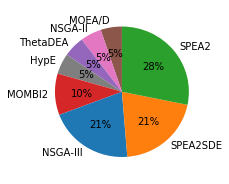

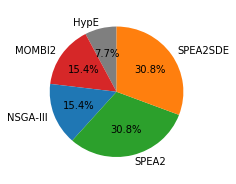

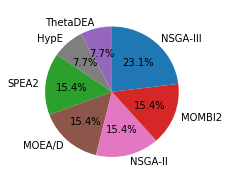

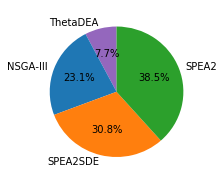

In [6]:
dfx = [dfb > 0]
dfx = pd.concat(dfx)
dfx = dfx.drop(columns=['FE'])
dfx = dfx.iloc[8:]

# labels=["SPEA2", "MOEA/D", "NSGA-II", "MOMBI2", "NSGA-III", "ThetaDEA", "SPEA2SDE", "HypE"]
# colors=["tab:green", "tab:brown", "tab:pink", "tab:red", "tab:blue","tab:purple","tab:orange","tab:grey"]

plt.figure(figsize=(3, 3))
dfi = dfx.cumsum().iloc[[-1]].transpose()    
dfi.columns = ['Count']
dfi.index.name = 'Algorithm'
dfi.reset_index(inplace=True)

dfi = dfi.loc[lambda dfi: dfi['Count'] != 0]
dfi = dfi.sort_values(by='Count', ascending=True)
labelx = [labels[alg] for alg in dfi.loc[:,'Algorithm']]
colorx = [colors[alg] for alg in dfi.loc[:,'Algorithm']]
plt.pie(dfi['Count'], autopct='%1.f%%', labels=labelx, colors=colorx, startangle=90)
plt.show()

dfx = np.array_split(dfx, 3)

for i in range(0, 3):
    plt.figure(figsize=(3.2, 3))
    dfi = dfx[i].cumsum().iloc[[-1]].transpose()    
    dfi.columns = ['Count']
    dfi.index.name = 'Algorithm'
    dfi.reset_index(inplace=True)
    
    dfi = dfi.loc[lambda dfi: dfi['Count'] != 0]
    dfi = dfi.sort_values(by='Count', ascending=True)
    labelx = [labels[alg] for alg in dfi.loc[:,'Algorithm']]
    colorx = [colors[alg] for alg in dfi.loc[:,'Algorithm']]
    plt.pie(dfi['Count'], autopct='%1.1f%%', labels=labelx, colors=colorx, startangle=90)
    plt.subplots_adjust(right=0.85)
    plt.savefig("piecount%s.pdf"%(i))
    plt.show()
    
